In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
m_file_prefixes= ['./data/eda_ca2010/total_flow_', './data/eda_ca2010/occupancy_', './data/eda_ca2010/speed_']
mean_labels= [('time', 'veh/5m'), ('time', '%'), ('time', 'mph')]
eig_labels= [('time', None), ('time', None), ('time', None)]

# m_file_prefixes= ['/var/tmp/ca_2010/total_flow_']
fid= "CA_2010"

In [4]:
def set_xaxis(ax, n_x, xlabel=None, ylabel=None):
    x_ticks_major= []
    x_ticks_minor= []
    x_labels_minor= []
    x_labels_major= []
    m_empty_string= ''
    for i in xrange(n_x):
        m_time_minute= 5 * (i + 1)
        m_minute_string= '{}M'.format(m_time_minute).zfill(5)
        if m_time_minute % 60 == 0:
            m_hour= m_time_minute / 60
            m_hour_string= '{}H'.format(m_hour).zfill(3)
            x_ticks_major.append(float(i))
            x_labels_major.append(m_hour_string)
        else:
            x_ticks_minor.append(float(i))
            x_labels_minor.append(m_minute_string)
    ax.set_xticks(x_ticks_minor, minor=True)
    ax.set_xticks(x_ticks_major, minor=False)
    ax.set_xticklabels(x_labels_major, minor=False, rotation=65)
    ax.grid(True, which='major')
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)

# Mean + Standard Deviation

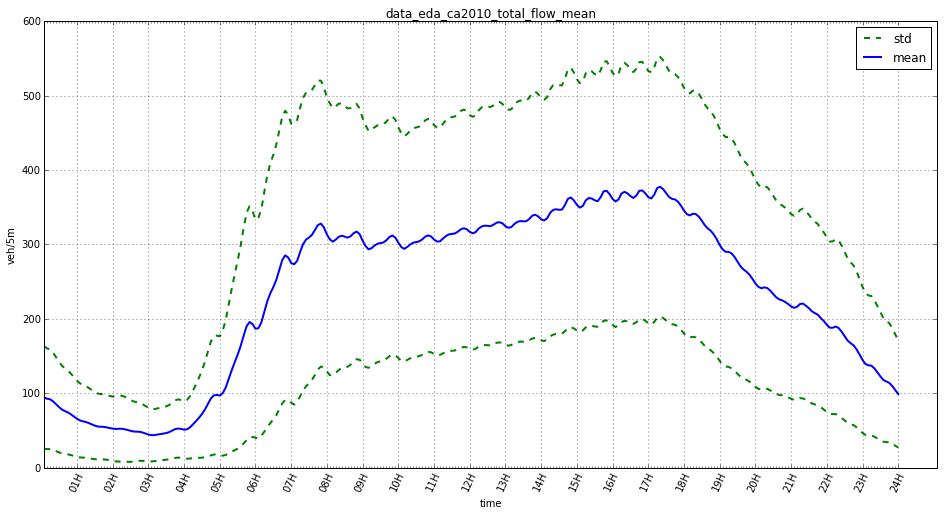

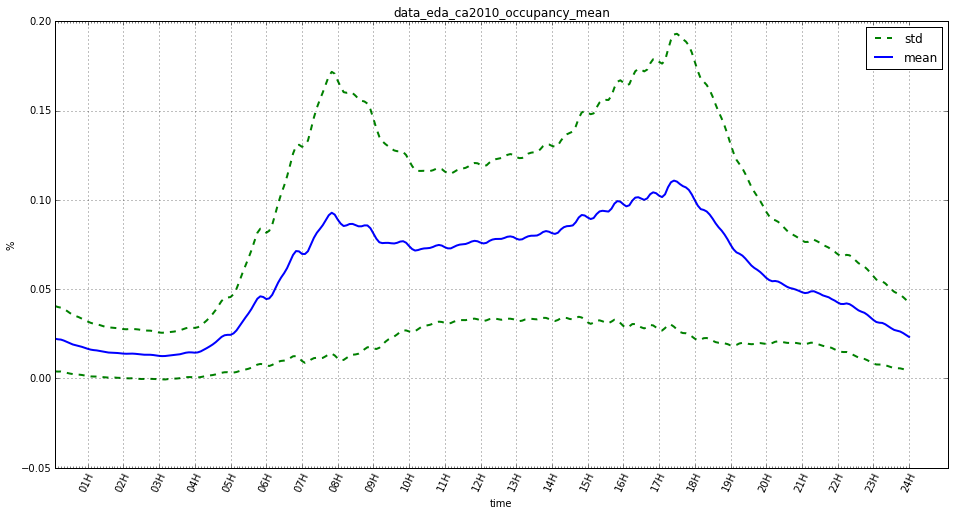

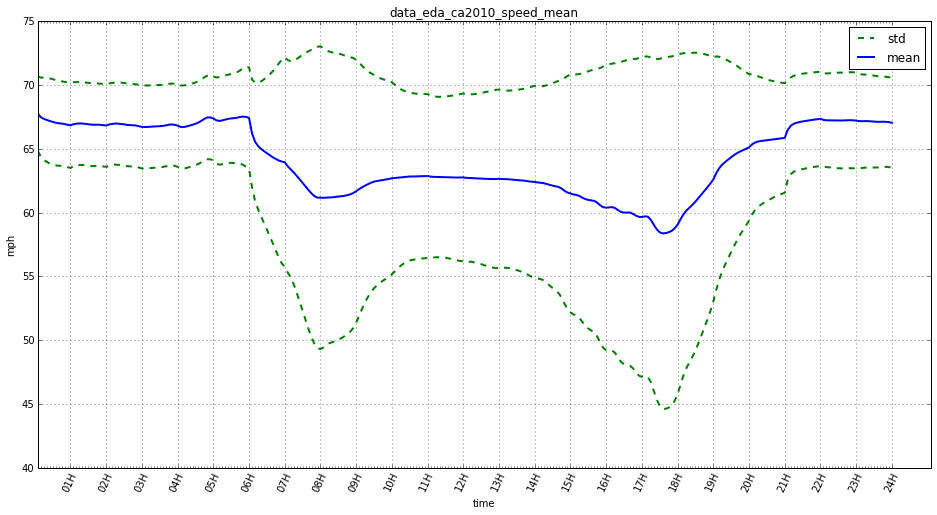

In [5]:
for p, labels in zip(m_file_prefixes, mean_labels):
    xlabel= labels[0]
    ylabel= labels[1]
    #
    fig, ax= plt.subplots(figsize=(16,8))
    m_filename= p + 'mean_vector.{}.csv'.format(fid)
    m_mean_vector= pd.read_csv(m_filename, header=None).values[0]
    #
    m_filename= p + 'std_vector.{}.csv'.format(fid)
    m_std_vector= pd.read_csv(m_filename, header=None).values[0]
    #
    msub_vec= m_mean_vector - m_std_vector
    madd_vec= m_mean_vector + m_std_vector
    ax.plot(msub_vec, c='green', ls='dashed', lw=2.0, label='std')
    ax.plot(m_mean_vector, c='blue', lw=2.0, label='mean')
    ax.plot(madd_vec, c='green', ls='dashed', lw=2.0)
    ax.legend()
    #
    m_title= (p.replace('/', '_') + 'mean')[2:]
    ax.set_title(m_title)
    #
    set_xaxis(ax, len(m_mean_vector), xlabel, ylabel)

# Top Eigenvectors

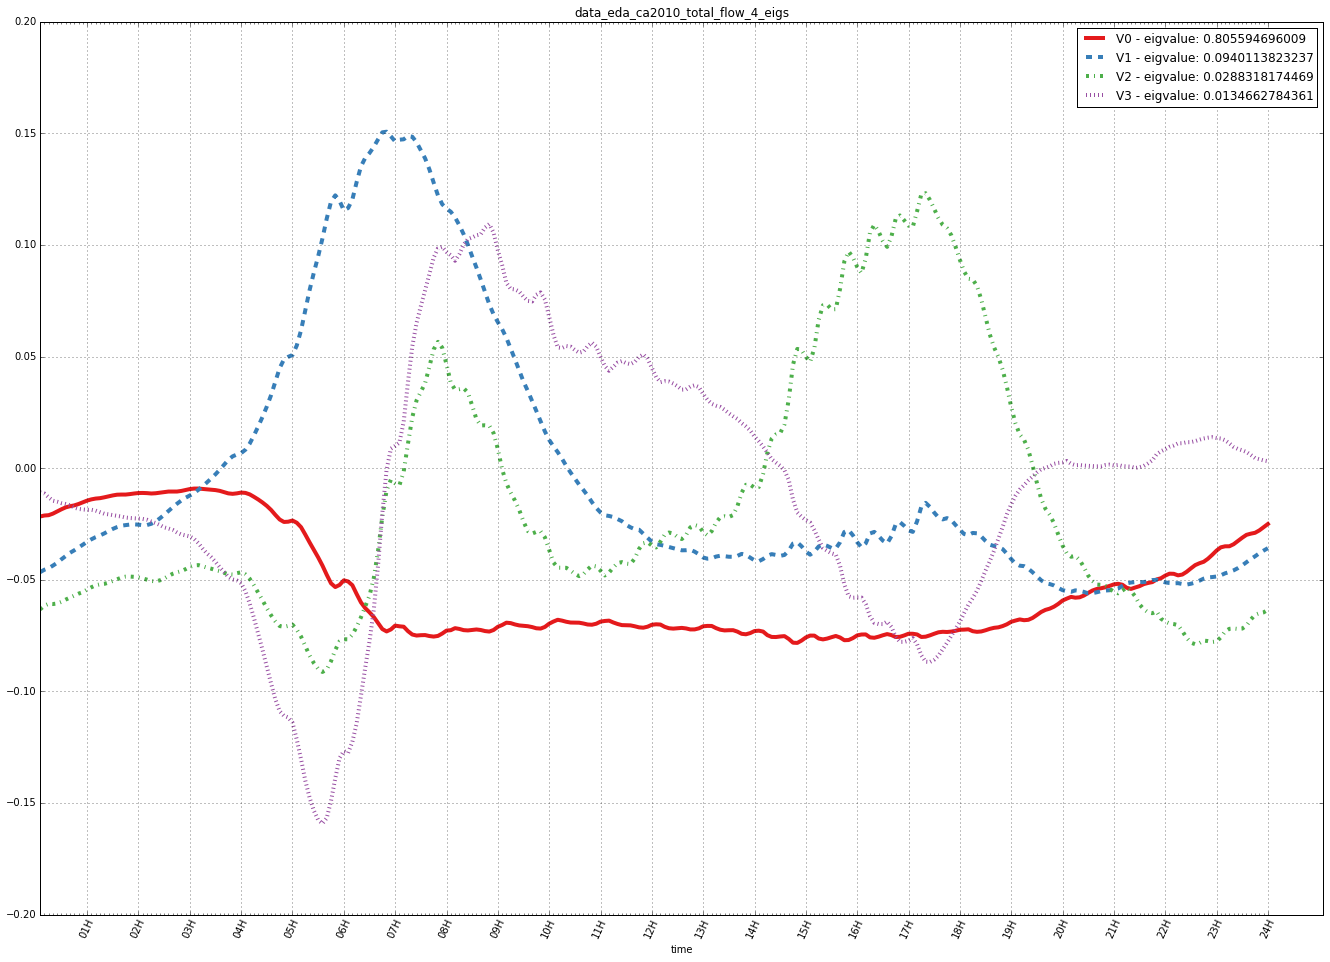

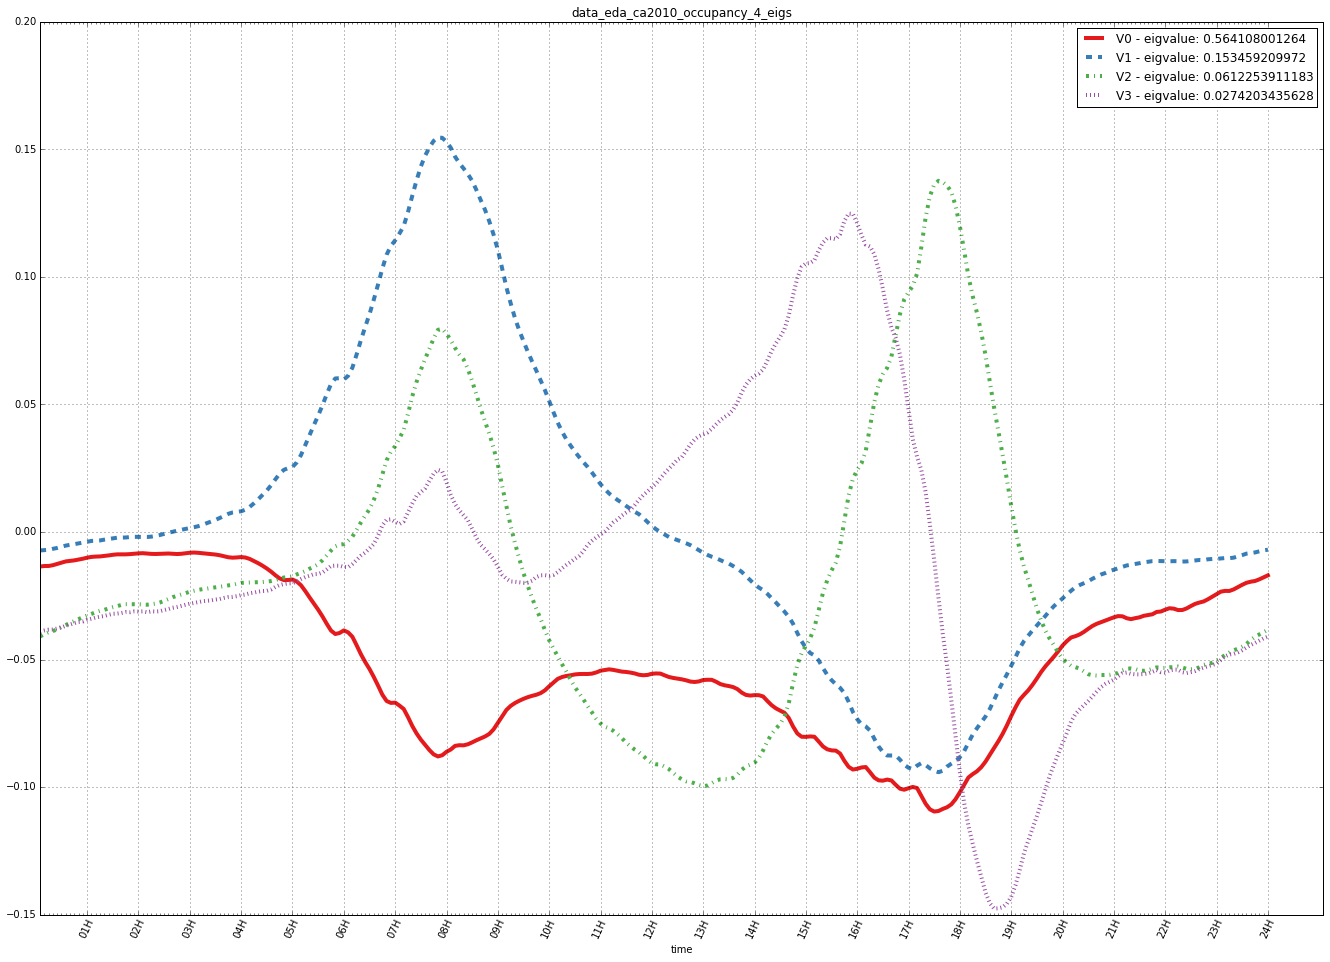

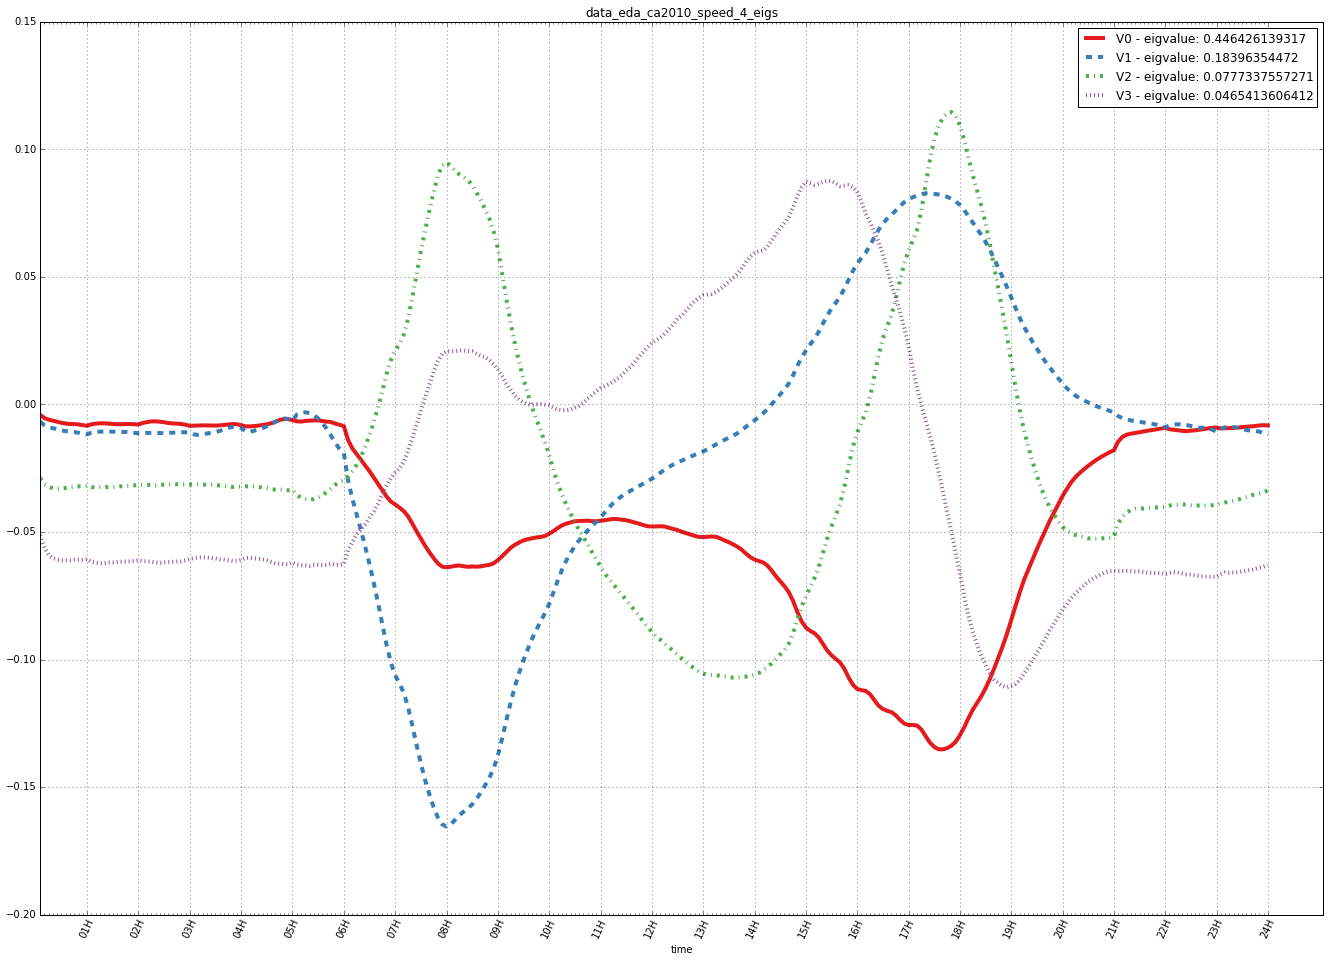

In [6]:
from matplotlib.pyplot import cm

n= 4
linestyles= ['solid', 'dashed', 'dashdot', 'dotted']
for p, labels in zip(m_file_prefixes, eig_labels):
    xlabel= labels[0]
    ylabel= labels[1]
    #
    m_filename= p + 'eigenvectors.{}.csv'.format(fid)
    m_eigs= pd.read_csv(m_filename, header=None).values
    m_eigs_t= m_eigs.T
    #
    m_filename= p + 'eigenvalues.{}.csv'.format(fid)
    m_eig_values= pd.read_csv(m_filename, header=None).values[0]
    #
#     colors=cm.rainbow(np.linspace(0,1,n))
    colors= ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']
    width= 23
    height= 16
    fig, ax= plt.subplots(figsize=(width,height))
    l_x= [i for i in xrange(shape(m_eigs_t)[1])]
    for i in xrange(n):
        l_y= m_eigs_t[i]
        m_eig_value= m_eig_values[i]
        m_label= 'V{} - eigvalue: {}'.format(i, m_eig_value)
        ax.plot(l_x, l_y, color=colors[i], linestyle=linestyles[i], lw=4.0, label=m_label)
    ax.legend()
    #
    m_title= (p.replace('/', '_') + '{}_eigs'.format(n))[2:]
    ax.set_title(m_title)
    #
    set_xaxis(ax, shape(m_eigs_t)[1], xlabel, ylabel)